In [13]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline


In [3]:
#import training data
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#summary of training data
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
train_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [6]:
train_df['Age'].isnull

<bound method Series.isnull of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

In [39]:
# identify columns with missing values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
# identify rows where age is missing
missing_age = train_df.loc[train_df['Age'].isnull()]
missing_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [42]:
# save index positions of missing rows 
missing_ages = list(missing_age.index)

In [7]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [45]:
# average age grouped by survival status, sex, and passenger class
group=train_df.groupby(['Survived', 'Sex', 'Pclass'])['Age'].mean()
group

Survived  Sex     Pclass
0         female  1         25.666667
                  2         36.000000
                  3         23.818182
          male    1         44.581967
                  2         33.369048
                  3         27.255814
1         female  1         34.939024
                  2         28.080882
                  3         19.329787
          male    1         36.248000
                  2         16.022000
                  3         22.274211
Name: Age, dtype: float64

In [54]:
# a column of mean age for each row (passenger) according to their Sex, Survived, and Pclass
transform_age=train_df.groupby(['Survived', 'Sex', 'Pclass'])['Age'].transform('mean')
transform_age

0      27.255814
1      34.939024
2      19.329787
3      34.939024
4      27.255814
         ...    
886    33.369048
887    34.939024
888    23.818182
889    36.248000
890    27.255814
Name: Age, Length: 891, dtype: float64

In [56]:
# fill missing values for age using avg values from transformed column
train_df['Age'].fillna(transform_age, inplace=True)

In [59]:
# verify filled missing values 
train_df.iloc[missing_ages].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,27.255814,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,16.022000,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,19.329787,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,27.255814,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,19.329787,0,0,330959,7.8792,NaN,Q


In [60]:
# verify there are no more missing age values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
# check missing values for 'embarked'
embark = train_df.loc[train_df['Embarked'].isnull()]
embark

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [63]:
#save index for missing values to verify later
missing_embarks = list(embark.index)
missing_embarks

[61, 829]

In [66]:
group_embark=train_df.groupby(['Survived', 'Sex', 'Pclass'])['Embarked'].count()
group_embark

Survived  Sex     Pclass
0         female  1           3
                  2           6
                  3          72
          male    1          77
                  2          91
                  3         300
1         female  1          89
                  2          70
                  3          72
          male    1          45
                  2          17
                  3          47
Name: Embarked, dtype: int64

In [69]:
missing_embar = train_df.loc[train_df.Cabin == 'B28']
missing_embar

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [67]:
# number of passengers for each embarkation port
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [70]:
# fill missing values with "S" for Southampton (most common port) for survived, pclass 1 and female
train_df['Embarked'].fillna('S', inplace=True)

In [73]:
# check that values are filled
train_df.iloc[missing_embarks]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


In [75]:
# verify no missing values in 'embarked' column
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [80]:
#reformat dataframe to only have numerical values
model = train_df.drop(['Name', 'Cabin', 'Ticket'], axis=1)
model

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,23.818182,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [81]:
# dummy variables for embarkation port
model = pd.get_dummies(data=model, columns=['Embarked'])
model.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,7.2500,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,0,0,1


In [82]:
# reassign 'female'= 0, 'male'= 1
model['Sex'] = model['Sex'].map({'female':0, 'male':1})
model.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,1


In [83]:
# create new column based on number of family members
model['family_num'] = model['SibSp'] + model['Parch']

# drop sibsp and parch columns
model.drop(['SibSp', 'Parch'], axis=1, inplace=True)
model.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,family_num
0,1,0,3,1,22.0,7.2500,0,0,1,1
1,2,1,1,0,38.0,71.2833,1,0,0,1
2,3,1,3,0,26.0,7.9250,0,0,1,0
3,4,1,1,0,35.0,53.1000,0,0,1,1
4,5,0,3,1,35.0,8.0500,0,0,1,0


In [93]:
#import testing data
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [94]:
#summary of testing data
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [38]:
#calculate and print the % of women who survived
women = train_df.loc[train_df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [20]:
#calculate and print the % of men who survived
men = train_df.loc[train_df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


<AxesSubplot:xlabel='Survived', ylabel='count'>

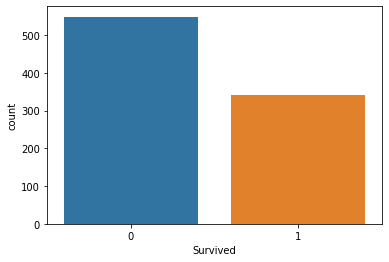

In [14]:
# number of passengers per survival status
sns.countplot(data=train_df, x='Survived', y='Pclass')

<AxesSubplot:xlabel='Survived', ylabel='count'>

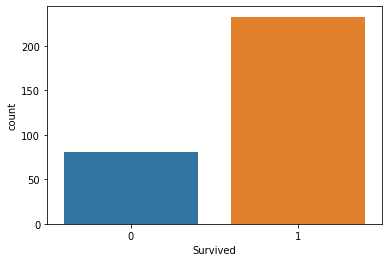

In [18]:
# number of women passengers per total women passengers
sns.countplot(women)

In [30]:
#number of women and men survivors
print(sum(women))
print(sum(men))

233
109


In [31]:
#number of women and men passengers
print(len(women))
print(len(men))

314
577


<AxesSubplot:xlabel='Survived', ylabel='count'>

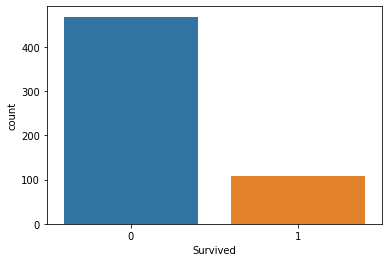

In [21]:
#number of men survivors per total number of men
sns.countplot(men)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

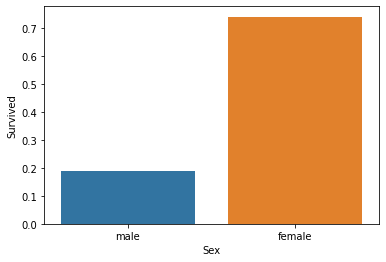

In [33]:
# ratio of passengers by gender that survived
sns.barplot(data=train_df, x='Sex', y='Survived', ci=None)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

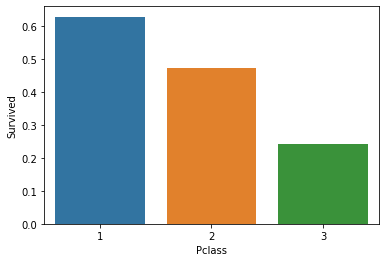

In [35]:
# ratio of passengers by class that survived
sns.barplot(data=train_df, x='Pclass', y='Survived', ci=None)

In [7]:
from sklearn.ensemble import RandomForestClassifier

y = train_df["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])

/Users/jizumi/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [8]:
X.shape

(891, 5)

In [9]:
X_test.shape

(418, 5)

In [10]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

In [11]:
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [12]:
predictions = model.predict(X_test)

In [13]:
output_df = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})

In [14]:
output_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [84]:
# 'survived' is target variable
y = model['Survived']

In [86]:
# attributes are all the columns EXCEPT 'survived'
x = model.drop(['Survived'], axis=1)

In [88]:
# import functions directly from sci-kit learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [89]:
# assign logistic regression function to variable
model = LogisticRegression()

In [90]:
# give training data to learn
model.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
# overall ratio of correct predictions for training data
model.score(x, y)

0.8069584736251403

In [95]:
# identify columns with missing values
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [97]:
# average age grouped by survival status, sex, and passenger class
test_group=test_df.groupby(['Sex', 'Pclass'])['Age'].mean()
test_group

Sex     Pclass
female  1         41.333333
        2         24.376552
        3         23.073400
male    1         40.520000
        2         30.940678
        3         24.525104
Name: Age, dtype: float64

In [98]:
# a column of mean age for each row (passenger) according to their Sex, Survived, and Pclass
transform_testage=test_df.groupby(['Sex', 'Pclass'])['Age'].transform('mean')
transform_testage

0      24.525104
1      23.073400
2      30.940678
3      24.525104
4      23.073400
         ...    
413    24.525104
414    41.333333
415    24.525104
416    24.525104
417    24.525104
Name: Age, Length: 418, dtype: float64

In [99]:
# fill missing values for age using avg values from transformed column
test_df['Age'].fillna(transform_testage, inplace=True)

In [101]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [102]:
#reformat dataframe to only have numerical values
test_model = test_df.drop(['Name', 'Cabin', 'Ticket'], axis=1)
test_model

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.500000,0,0,7.8292,Q
1,893,3,female,47.000000,1,0,7.0000,S
2,894,2,male,62.000000,0,0,9.6875,Q
3,895,3,male,27.000000,0,0,8.6625,S
4,896,3,female,22.000000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,24.525104,0,0,8.0500,S
414,1306,1,female,39.000000,0,0,108.9000,C
415,1307,3,male,38.500000,0,0,7.2500,S
416,1308,3,male,24.525104,0,0,8.0500,S


In [103]:
# dummy variables for embarkation port
test_model = pd.get_dummies(data=test_model, columns=['Embarked'])
test_model.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,male,34.5,0,0,7.8292,0,1,0
1,893,3,female,47.0,1,0,7.0000,0,0,1
2,894,2,male,62.0,0,0,9.6875,0,1,0
3,895,3,male,27.0,0,0,8.6625,0,0,1
4,896,3,female,22.0,1,1,12.2875,0,0,1


In [104]:
# reassign 'female'= 0, 'male'= 1
test_model['Sex'] = test_model['Sex'].map({'female':0, 'male':1})
test_model.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,34.5,0,0,7.8292,0,1,0
1,893,3,0,47.0,1,0,7.0000,0,0,1
2,894,2,1,62.0,0,0,9.6875,0,1,0
3,895,3,1,27.0,0,0,8.6625,0,0,1
4,896,3,0,22.0,1,1,12.2875,0,0,1


In [105]:
# create new column based on number of family members
test_model['family_num'] = test_model['SibSp'] + test_model['Parch']

# drop sibsp and parch columns
test_model.drop(['SibSp', 'Parch'], axis=1, inplace=True)
test_model.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,family_num
0,892,3,1,34.5,7.8292,0,1,0,0
1,893,3,0,47.0,7.0000,0,0,1,1
2,894,2,1,62.0,9.6875,0,1,0,0
3,895,3,1,27.0,8.6625,0,0,1,0
4,896,3,0,22.0,12.2875,0,0,1,2


In [108]:
test_model.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Embarked_C     0
Embarked_Q     0
Embarked_S     0
family_num     0
dtype: int64

In [110]:
fare = test_model.loc[test_model['Fare'].isnull()]
fare

,PassengerId,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,family_num
152,1044,3,1,60.5,NaN,0,0,1,0


In [111]:
# average age grouped by survival status, sex, and passenger class
fare_grp=test_model.groupby(['Sex', 'Pclass'])['Fare'].mean()
fare_grp

Sex  Pclass
0    1         115.591168
     2          26.438750
     3          13.735129
1    1          75.586551
     2          20.184654
     3          11.826350
Name: Fare, dtype: float64

In [112]:
test_model['Fare'].fillna('11.826350', inplace=True)

In [113]:
test_model.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
family_num     0
dtype: int64

In [114]:
x_test = test_model

In [115]:
# generate predictions
y_pred = model.predict(x_test)

In [117]:
# overall ratio of correct predictions for test data
model.score(x_test, y_pred)

1.0

In [119]:
y_pred.shape

(418,)

In [120]:
y.shape

(891,)